# Gridsearch CV with SVM

## Ridhwan Hassan

In [26]:
import pandas as pd  
import numpy as np
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix  
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
%matplotlib inline

In [27]:
irisdata = datasets.load_iris()
irisdata = pd.DataFrame(data= np.c_[irisdata['data'], irisdata['target']], columns= irisdata['feature_names'] + ['target'])

In [28]:
print(irisdata.info())
irisdata.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB
None


sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0

In [50]:
irisdata.describe()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000

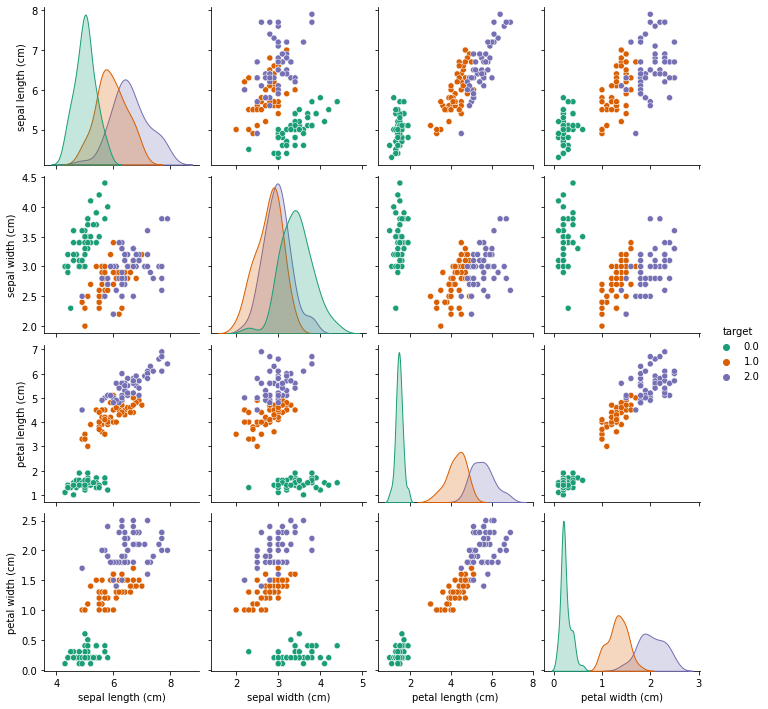

In [29]:
sns.pairplot(irisdata,hue='target',palette='Dark2')

In [51]:
X = irisdata.drop('target', axis=1)  
y = irisdata['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [52]:
kernels = ['Polynomial', 'RBF', 'Sigmoid','Linear']
def getClassifier(ktype):
    if ktype == 0:
        return SVC(kernel='poly', degree=8, gamma="auto")
    elif ktype == 1:
        return SVC(kernel='rbf', gamma="auto")
    elif ktype == 2:
        return SVC(kernel='sigmoid', gamma="auto")
    elif ktype == 3:
        return SVC(kernel='linear', gamma="auto")

In [53]:
for i in range(4):
    svclassifier = getClassifier(i) 
    svclassifier.fit(X_train, y_train)
    y_pred = svclassifier.predict(X_test)
    print("Evaluation:", kernels[i], "kernel")
    print(classification_report(y_test,y_pred))

Evaluation: Polynomial kernel
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        16
         1.0       1.00      0.94      0.97        17
         2.0       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

Evaluation: RBF kernel
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        16
         1.0       1.00      0.94      0.97        17
         2.0       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

Evaluation: Sigmoid kernel
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        16
         1.0       0.00      0.00      0.00      

D:\OneDrive\Masters\SEM 3\venv38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\OneDrive\Masters\SEM 3\venv38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\OneDrive\Masters\SEM 3\venv38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}

In [55]:
grid = GridSearchCV(SVC(), param_grid, refit=True,verbose=0)
grid.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']})

In [56]:
print(grid.best_params_)

{'C': 1, 'gamma': 1, 'kernel': 'linear'}


In [57]:
grid_predictions = grid.predict(X_test)
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        16
         1.0       1.00      0.94      0.97        17
         2.0       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [58]:
sns.heatmap(confusion_matrix(y_test,grid_predictions), annot=True, cmap='PuBu')

<AxesSubplot:>

# Multiclassifier

### One-Vs-The-Rest

In [7]:
fetal = pd.read_csv('fetal_health.csv')
fetal.head()

baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                             73.0                                   0.5   
1                             17.0                                   2.1   
2                             16.0                                   2.1   
3                             16.0                                   2.4   
4                             16.0                                   2.4   

   percentage_of_time_with_abnormal_long_term_variability  ...  histogram_min  \
0                                               43.0       ...           62.0   
1                                                0.0       ...           68.0   
2                                                0.0       ...           68.0   
3                                                0.0       ...           53.0   
4                                                0.0       ...           53.0   

   histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes  \
0          126.0                        2.0                         0.0   
1          198.0                        6.0                         1.0   
2          198.0                        5.0                         1.0   
3          170.0                       11.0                         0.0   
4          170.0                        9.0                         0.0   

   histogram_mode  histogram_mean  histogram_median  histogram_variance  \
0           120.0           137.0             121.0                73.0   
1           141.0           136.0             140.0                12.0   
2           141.0           135.0             138.0                13.0   
3           137.0           134.0             137.0                13.0   
4           137.0           136.0             138.0                11.0   

   histogram_tendency  fetal_health  
0                 1.0           2.0  
1                 0.0           1.0  
2                 0.0           1.0  
3                 1.0           1.0  
4                 1.0           1.0  

[5 rows x 22 columns]

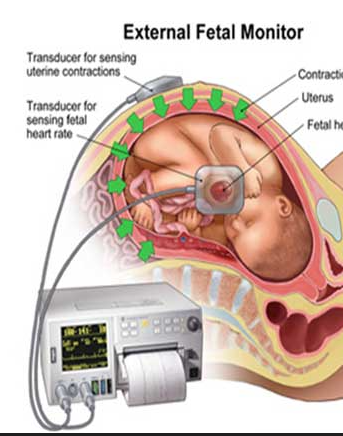

In [8]:
from IPython.display import Image

Image("Screenshot 2022-07-07 200141.png")

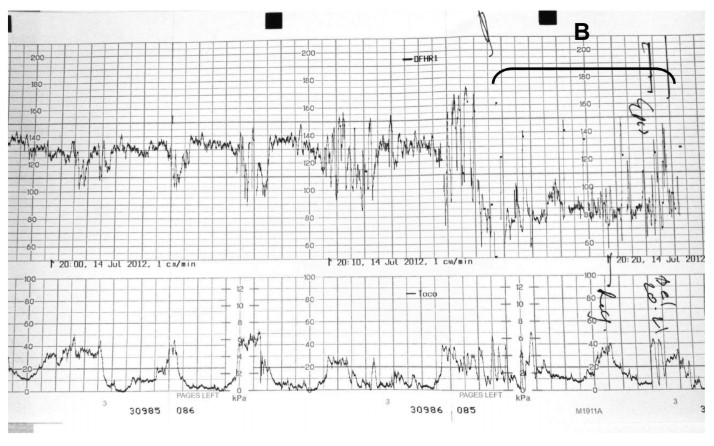

In [6]:
Image("ctg.jpg")

- 'baseline value' FHR baseline (beats per minute)
- 'accelerations' Number of accelerations per second
- 'fetal_movement' Number of fetal movements per second
- 'uterine_contractions' Number of uterine contractions per second
- 'light_decelerations' Number of light decelerations per second
- 'severe_decelerations' Number of severe decelerations per second
- 'prolongued_decelerations' Number of prolonged decelerations per second
- 'abnormal_short_term_variability' Percentage of time with abnormal short term variability
- 'mean_value_of_short_term_variability' Mean value of short term variability
- 'percentage_of_time_with_abnormal_long_term_variability' Percentage of time with abnormal long term variability
- 'mean_value_of_long_term_variability' Mean value of long term variability
- 'histogram_width' Width of FHR histogram
- 'histogram_min' Minimum (low frequency) of FHR histogram
- 'histogram_max' Maximum (high frequency) of FHR histogram
- 'histogram_number_of_peaks' Number of histogram peaks
- 'histogram_number_of_zeroes' Number of histogram zeros
- 'histogram_mode' Histogram mode
- 'histogram_mean' Histogram mean
- 'histogram_median' Histogram median
- 'histogram_variance' Histogram variance
- 'histogram_tendency' Histogram tendency

Target

'fetal_health' Tagged as 1 (Normal), 2 (Suspect) and 3 (Pathological)

In [9]:
print('data shape ', fetal.shape)
print('')
print('\ndata info ', fetal.info())

data shape  (2126, 22)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_

In [10]:
fetal.describe().T

count        mean  \
baseline value                                      2126.0  133.303857   
accelerations                                       2126.0    0.003178   
fetal_movement                                      2126.0    0.009481   
uterine_contractions                                2126.0    0.004366   
light_decelerations                                 2126.0    0.001889   
severe_decelerations                                2126.0    0.000003   
prolongued_decelerations                            2126.0    0.000159   
abnormal_short_term_variability                     2126.0   46.990122   
mean_value_of_short_term_variability                2126.0    1.332785   
percentage_of_time_with_abnormal_long_term_vari...  2126.0    9.846660   
mean_value_of_long_term_variability                 2126.0    8.187629   
histogram_width                                     2126.0   70.445908   
histogram_min                                       2126.0   93.579492   
histogram_max                                       2126.0  164.025400   
histogram_number_of_peaks                           2126.0    4.068203   
histogram_number_of_zeroes                          2126.0    0.323612   
histogram_mode                                      2126.0  137.452023   
histogram_mean                                      2126.0  134.610536   
histogram_median                                    2126.0  138.090310   
histogram_variance                                  2126.0   18.808090   
histogram_tendency                                  2126.0    0.320320   
fetal_health                                        2126.0    1.304327   

                                                          std    min      25%  \
baseline value                                       9.840844  106.0  126.000   
accelerations                                        0.003866    0.0    0.000   
fetal_movement                                       0.046666    0.0    0.000   
uterine_contractions                                 0.002946    0.0    0.002   
light_decelerations                                  0.002960    0.0    0.000   
severe_decelerations                                 0.000057    0.0    0.000   
prolongued_decelerations                             0.000590    0.0    0.000   
abnormal_short_term_variability                     17.192814   12.0   32.000   
mean_value_of_short_term_variability                 0.883241    0.2    0.700   
percentage_of_time_with_abnormal_long_term_vari...  18.396880    0.0    0.000   
mean_value_of_long_term_variability                  5.628247    0.0    4.600   
histogram_width                                     38.955693    3.0   37.000   
histogram_min                                       29.560212   50.0   67.000   
histogram_max                                       17.944183  122.0  152.000   
histogram_number_of_peaks                            2.949386    0.0    2.000   
histogram_number_of_zeroes                           0.706059    0.0    0.000   
histogram_mode                                      16.381289   60.0  129.000   
histogram_mean                                      15.593596   73.0  125.000   
histogram_median                                    14.466589   77.0  129.000   
histogram_variance                                  28.977636    0.0    2.000   
histogram_tendency                                   0.610829   -1.0    0.000   
fetal_health                                         0.614377    1.0    1.000   

                                                        50%      75%      max  
baseline value                                      133.000  140.000  160.000  
accelerations                                         0.002    0.006    0.019  
fetal_movement                                        0.000    0.003    0.481  
uterine_contractions                                  0.004    0.007    0.015  
light_decelerations                                   0.000    0.003    0.015  
severe

<AxesSubplot:>

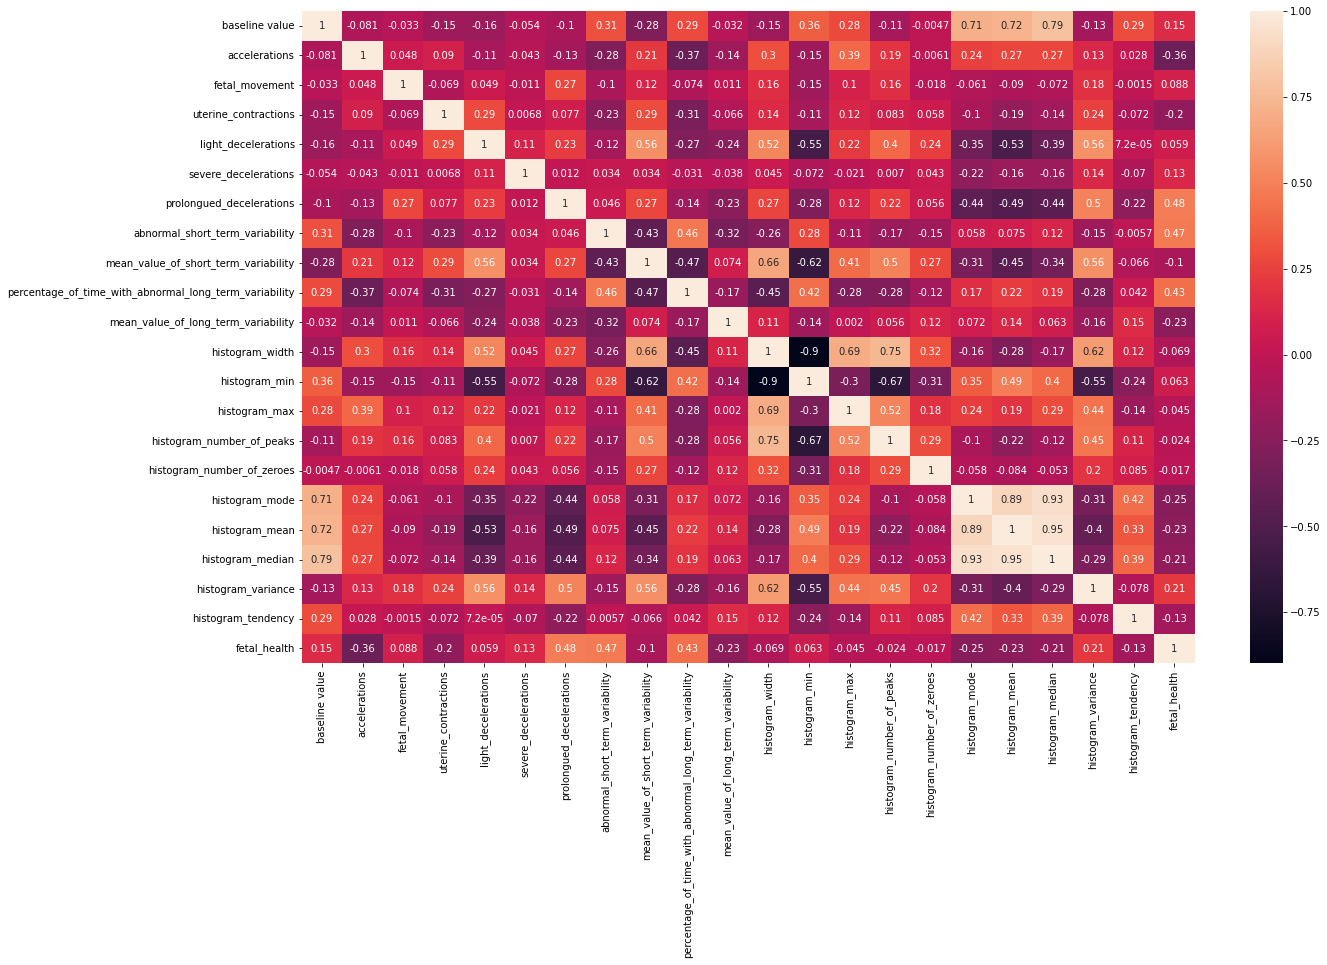

In [11]:
plt.figure(figsize=(20,12))
sns.heatmap(fetal.corr(), annot=True)

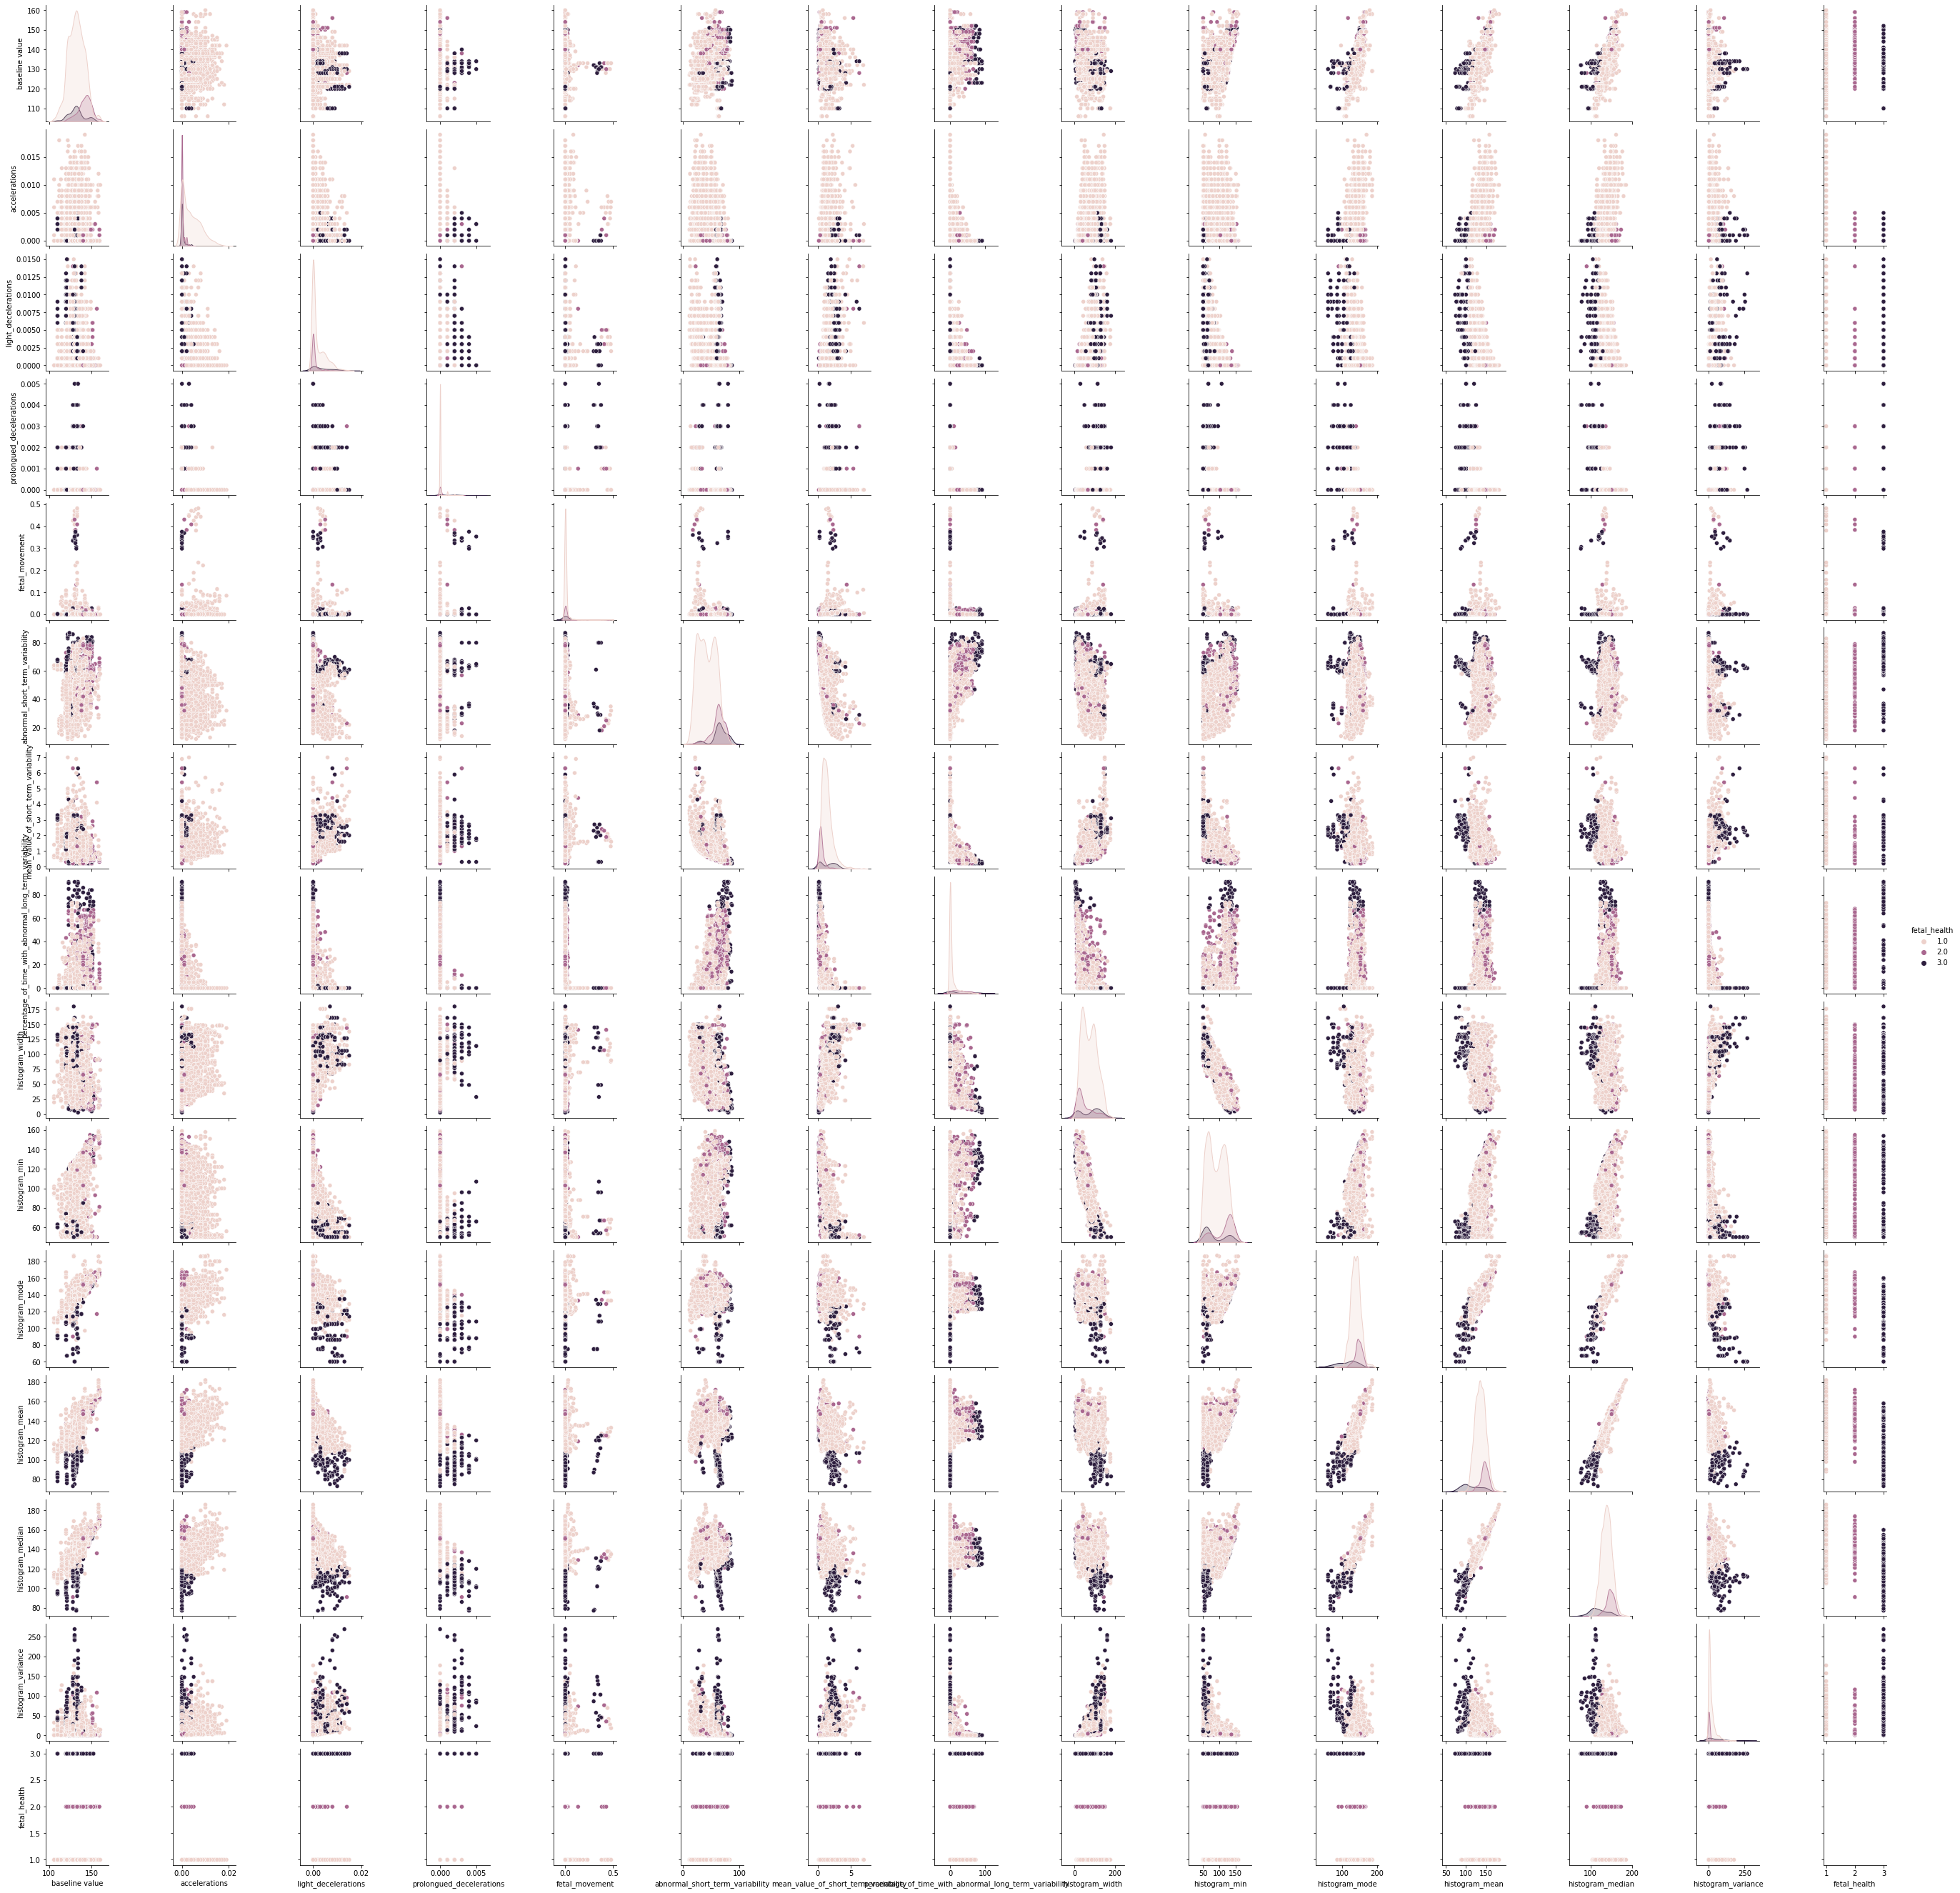

In [12]:
cols = ['baseline value',
'accelerations',
'light_decelerations',
'prolongued_decelerations',
'fetal_movement',
'abnormal_short_term_variability',
'mean_value_of_short_term_variability',
'percentage_of_time_with_abnormal_long_term_variability',
'histogram_width',
'histogram_min',
'histogram_mode',
'histogram_mean',
'histogram_median',
'histogram_variance',
'fetal_health']
sns.pairplot(fetal, vars=cols, hue='fetal_health')

In [13]:
fetal['prolongued_decelerations'].value_counts()

0.000    1948
0.002      72
0.001      70
0.003      24
0.004       9
0.005       3
Name: prolongued_decelerations, dtype: int64

In [14]:
sns.countplot(fetal['fetal_health'], x='target')

D:\OneDrive\Masters\SEM 3\venv38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fetal_health', ylabel='count'>

D:\OneDrive\Masters\SEM 3\venv38\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


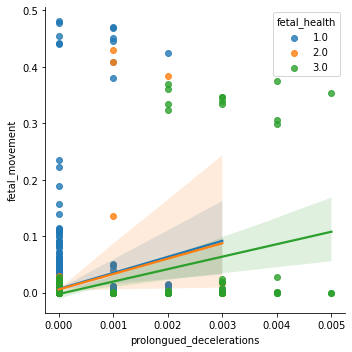

In [15]:
sns.lmplot(data =fetal,x="prolongued_decelerations",y="fetal_movement", hue="fetal_health",legend_out=False)
plt.show()

In [16]:
sns.lmplot(data =fetal,x="severe_decelerations",y="fetal_movement", hue="fetal_health",legend_out=False)
plt.show()

D:\OneDrive\Masters\SEM 3\venv38\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


D:\OneDrive\Masters\SEM 3\venv38\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


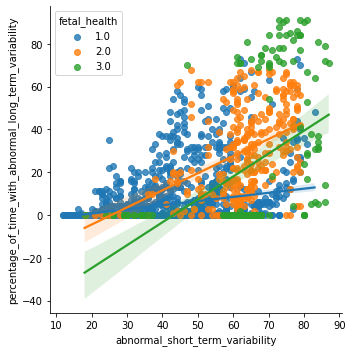

In [17]:
sns.lmplot(data =fetal,x="abnormal_short_term_variability",y="percentage_of_time_with_abnormal_long_term_variability", hue="fetal_health",legend_out=False)
plt.show()

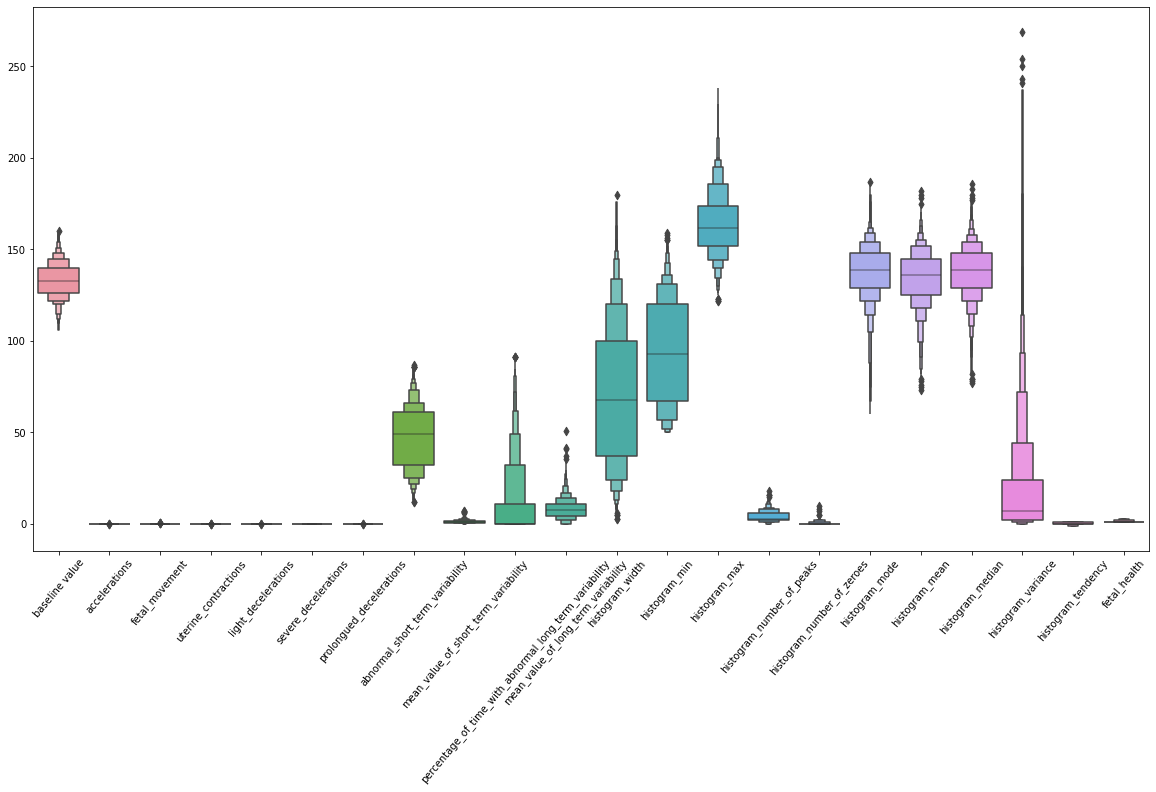

In [18]:
plt.figure(figsize=(20,10))
sns.boxenplot(data = fetal)
plt.xticks(rotation=50)
plt.show()

### Data processing and transformation

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, LabelBinarizer, OrdinalEncoder
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [20]:
data = fetal.copy()
X=data.drop(["fetal_health"],axis=1)
y=data["fetal_health"]

In [21]:
# Create a class to select numerical or categorical columns
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [22]:
num_attribs = X.columns

def pipeline(num_attribs):
    num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy="mean")),
        ('std_scaler', StandardScaler()),
    ])
    
    return FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline)
    ])

full_pipeline = pipeline(num_attribs)

In [23]:
X = full_pipeline.fit_transform(X)
X_df = pd.DataFrame(X, columns=num_attribs)   
X_df.describe().T

count          mean  \
baseline value                                      2126.0  1.069490e-15   
accelerations                                       2126.0 -4.010589e-17   
fetal_movement                                      2126.0 -1.336863e-17   
uterine_contractions                                2126.0 -1.336863e-16   
light_decelerations                                 2126.0 -5.347452e-17   
severe_decelerations                                2126.0  6.684315e-18   
prolongued_decelerations                            2126.0  1.336863e-17   
abnormal_short_term_variability                     2126.0 -7.352747e-17   
mean_value_of_short_term_variability                2126.0  6.684315e-17   
percentage_of_time_with_abnormal_long_term_vari...  2126.0 -5.347452e-17   
mean_value_of_long_term_variability                 2126.0  2.406354e-16   
histogram_width                                     2126.0 -3.007942e-17   
histogram_min                                       2126.0 -4.679021e-17   
histogram_max                                       2126.0 -1.203177e-16   
histogram_number_of_peaks                           2126.0 -1.671079e-16   
histogram_number_of_zeroes                          2126.0  2.757280e-17   
histogram_mode                                      2126.0  1.069490e-16   
histogram_mean                                      2126.0 -6.684315e-16   
histogram_median                                    2126.0  2.673726e-16   
histogram_variance                                  2126.0 -5.347452e-17   
histogram_tendency                                  2126.0 -1.069490e-16   

                                                         std       min  \
baseline value                                      1.000235 -2.775197   
accelerations                                       1.000235 -0.822388   
fetal_movement                                      1.000235 -0.203210   
uterine_contractions                                1.000235 -1.482465   
light_decelerations                                 1.000235 -0.638438   
severe_decelerations                                1.000235 -0.057476   
prolongued_decelerations                            1.000235 -0.268754   
abnormal_short_term_variability                     1.000235 -2.035639   
mean_value_of_short_term_variability                1.000235 -1.282833   
percentage_of_time_with_abnormal_long_term_vari...  1.000235 -0.535361   
mean_value_of_long_term_variability                 1.000235 -1.455081   
histogram_width                                     1.000235 -1.731757   
histogram_min                                       1.000235 -1.474609   
histogram_max                                       1.000235 -2.342558   
histogram_number_of_peaks                           1.000235 -1.379664   
histogram_number_of_zeroes                          1.000235 -0.458444   
histogram_mode                                      1.000235 -4.729191   
histogram_mean                                      1.000235 -3.951945   
histogram_median                                    1.000235 -4.223849   
histogram_variance                                  1.000235 -0.649208   
histogram_tendency                                  1.000235 -2.162031   

                                                         25%       50%  \
baseline value                                     -0.742373 -0.030884   
accelerations                                      -0.822388 -0.304881   
fetal_movement                                     -0.203210 -0.203210   
uterine_contractions                               -0.803434 -0.124404   
light_decelerations                                -0.638438 -0.638438   
severe_decelerations                               -0.057476 -0.057476   
prolongued_decelerations                           -0.268754 -0.268754   
abnormal_short_term_variability                    -0.872088  0.116930   
mean_value_of_short_term_variability               -0.716603 -0.150373   
percentage_

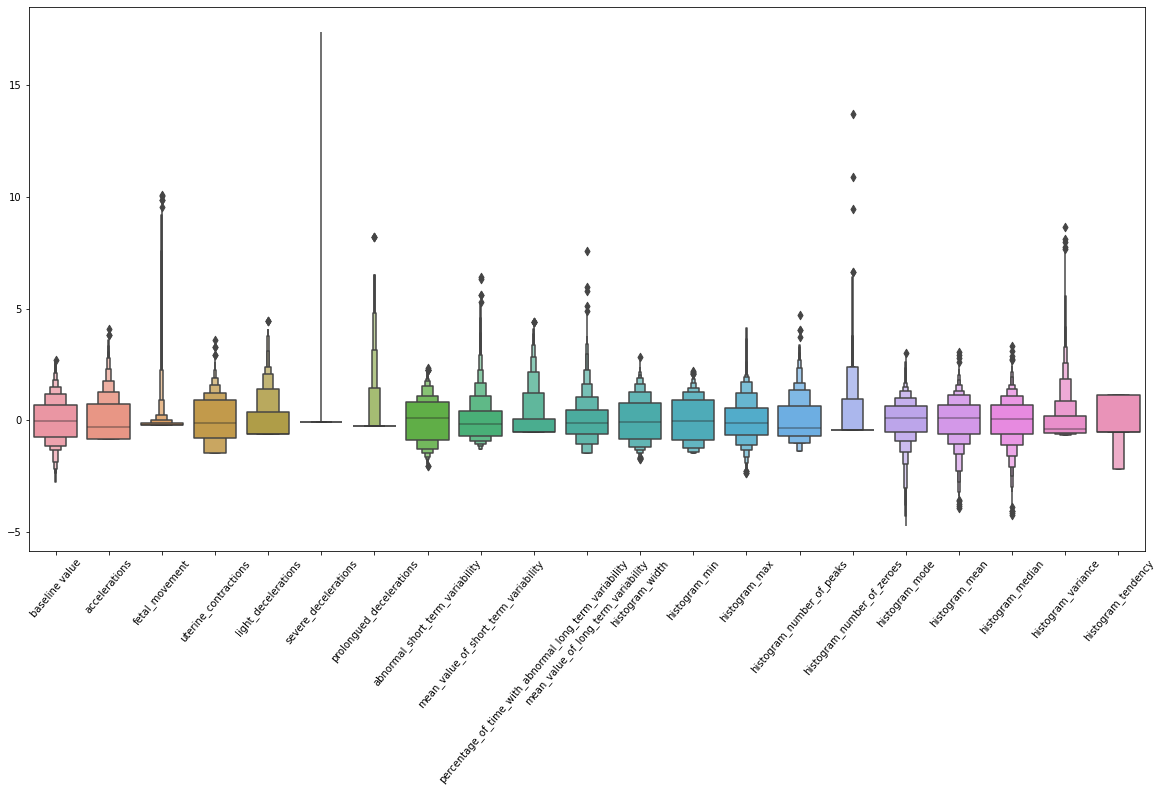

In [24]:
plt.figure(figsize=(20,10))
sns.boxenplot(data = X_df)
plt.xticks(rotation=50)
plt.show()

We go with a 80-20% train-test split using StratifiedShuffleSplit

In [25]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

## One vs All

In [26]:
models = {
    "RF": {
        'model': RandomForestClassifier,
        'params': {
            'criterion' : ["gini", "entropy"]
        }
    },
    "LR": {
        'model': LogisticRegression,
        'params': {
            'C': [1,10,20],
            'solver': ['newton-cg', 'liblinear']
        }
    },
    "SVM": {
        'model': SVC,
        'params': {
            'C': [0.01, 0.1, 1],
            'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
            'gamma' : ['scale', 'auto']
        }
    }
}

In [27]:
results = []

for model_name, attr in models.items():
    gridcv = GridSearchCV(attr['model'](), attr['params'], cv=5, verbose=True, refit=True)
    gridcv.fit(X_train, y_train)
    results.append({
        'model': model_name,
        'best_score': gridcv.best_score_,
        'best_params': gridcv.best_params_
    })
    
model_result_df = pd.DataFrame(results, columns=['model', 'best_score', 'best_params'])
model_result_df.sort_values(by=['best_score'], ascending=False)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits


model  best_score                                  best_params
0    RF    0.942941                        {'criterion': 'gini'}
2   SVM    0.912941  {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
1    LR    0.900000              {'C': 1, 'solver': 'liblinear'}

In [28]:
gridcv.best_estimator_

SVC(C=1)

In [29]:
model = OneVsRestClassifier(SVC(**gridcv.best_params_, probability=True))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.92      0.97      0.94       332
         2.0       0.67      0.54      0.60        59
         3.0       0.83      0.71      0.77        35

    accuracy                           0.89       426
   macro avg       0.81      0.74      0.77       426
weighted avg       0.88      0.89      0.88       426



<AxesSubplot:>

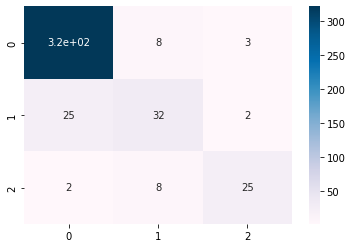

In [31]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='PuBu')

In [32]:
import utils as utils

1.0 ROC AUC OvR: 0.9710
2.0 ROC AUC OvR: 0.9370
3.0 ROC AUC OvR: 0.9809
average ROC AUC OvR: 0.9630


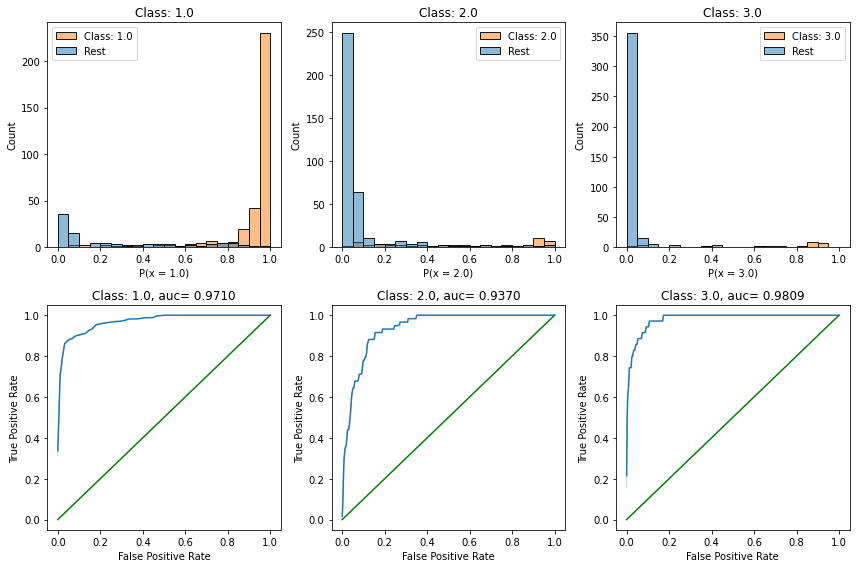

In [33]:
# Plots the Probability Distributions and the ROC Curves One vs Rest
classes = model.classes_
plt.figure(figsize = (12, 8))
bins = [i/20 for i in range(20)] + [1]
roc_auc_ovr = {}

for i in range(len(classes)):
    # Gets the class
    c = classes[i]
    
    # Prepares an auxiliar dataframe to help with the plots
    X_test = pd.DataFrame(X_test, columns=num_attribs)   
    df_aux = X_test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_test]
    df_aux['prob'] = y_proba[:, i]
    df_aux = df_aux.reset_index(drop = True)
    
    # Calculates the ROC AUC OvR
    class_roc = utils.roc_auc_score(df_aux['class'], df_aux['prob'])
    roc_auc_ovr[c] = class_roc
    
    # Plots the probability distribution for the class and the rest
    ax = plt.subplot(2, 3, i+1)
    sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
    ax.set_title(f"Class: {c}")
    ax.legend([f"Class: {c}", "Rest"])
    ax.set_xlabel(f"P(x = {c})")
    
    # Calculates the ROC Coordinates and plots the ROC Curves
    ax_bottom = plt.subplot(2, 3, i+4)
    tpr, fpr = utils.get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    utils.plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
    ax_bottom.set_title(f"Class: {c}, auc= {class_roc:.4f}")
    # ax_bottom.set_label(f"class: {c}, auc= {class_roc:.4f}")
        
plt.tight_layout()

avg_roc_auc = 0
i = 0
for k in roc_auc_ovr:
    avg_roc_auc += roc_auc_ovr[k]
    i += 1
    print(f"{k} ROC AUC OvR: {roc_auc_ovr[k]:.4f}")
print(f"average ROC AUC OvR: {avg_roc_auc/i:.4f}")

## One vs one

In [34]:
model = SVC(**gridcv.best_params_, probability=True, decision_function_shape='ovo')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

D:\OneDrive\Masters\SEM 3\venv38\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
D:\OneDrive\Masters\SEM 3\venv38\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [35]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

D:\OneDrive\Masters\SEM 3\venv38\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\OneDrive\Masters\SEM 3\venv38\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
D:\OneDrive\Masters\SEM 3\venv38\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.94      0.95      0.94       332
         2.0       0.61      0.68      0.64        59
         3.0       0.88      0.66      0.75        35

    accuracy                           0.88       426
   macro avg       0.81      0.76      0.78       426
weighted avg       0.89      0.88      0.89       426



<AxesSubplot:>

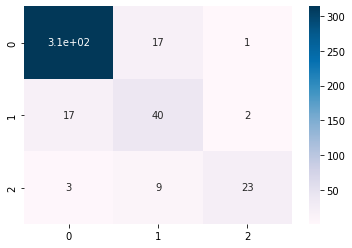

In [37]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='PuBu')

In [38]:
from itertools import combinations

classes = model.classes_

classes_combinations = []
combs = combinations(classes, 2)
for comb in combs:
    classes_combinations.append(list(comb))
classes_combinations

[[1.0, 2.0], [1.0, 3.0], [2.0, 3.0]]

In [41]:
# Plots the Probability Distributions and the ROC Curves One vs ONe
class_list = list(classes)
plt.figure(figsize = (20, 7))
bins = [i/20 for i in range(20)] + [1]
roc_auc_ovo = {}

for i in range(len(classes_combinations)):
    # Gets the class
    comb = classes_combinations[i]
    c1 = comb[0]
    c2 = comb[1]
    c1_index = class_list.index(c1)
    title = f"{c1} vs {c2}"
    
    # Prepares an auxiliar dataframe to help with the plots
    df_aux = X_test.copy()
    df_aux['class'] = y_test
    df_aux['prob'] = y_proba[:, c1_index]
    
    # Slices only the subset with both classes
    df_aux = df_aux[(df_aux['class'] == c1) | (df_aux['class'] == c2)]
    df_aux['class'] = [1 if y == c1 else 0 for y in df_aux['class']]
    df_aux = df_aux.reset_index(drop = True)
    
    # Calculates the ROC AUC OvO
    class_roc = utils.roc_auc_score(df_aux['class'], df_aux['prob'])    
    roc_auc_ovo[title] = class_roc
    
    # Plots the probability distribution for the class and the rest
    ax = plt.subplot(2, 6, i+1)
    sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
    ax.set_title(title)
    ax.legend([f"Class 1: {c1}", f"Class 0: {c2}"])
    ax.set_xlabel(f"P(x = {c1})")
    
    # Calculates the ROC Coordinates and plots the ROC Curves
    ax_bottom = plt.subplot(2, 6, i+7)
    tpr, fpr = utils.get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    utils.plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
    ax_bottom.set_title(f"{title}, auc= {class_roc:.4f}")
    
plt.tight_layout()

### References

- https://github.com/vinyluis/Articles/blob/main/ROC%20Curve%20and%20ROC%20AUC/ROC%20Curve%20-%20Multiclass.ipynb
- https://towardsdatascience.com/multiclass-classification-evaluation-with-roc-curves-and-roc-auc-294fd4617e3a
- https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsOneClassifier.html